In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("F:\Coding Dojo\Data\wisconsinBreastCancer - wisconsinBreastCancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Drop unnecessary column

# Binarize target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Save X data
X = df.drop(columns = 'diagnosis')
# Encode our target
y = df['diagnosis']

In [5]:
X.shape

(569, 31)

Scale Data

In [6]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

Fit PCA

In [7]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

looking at the moment it levels of... 4... but 7 is better.

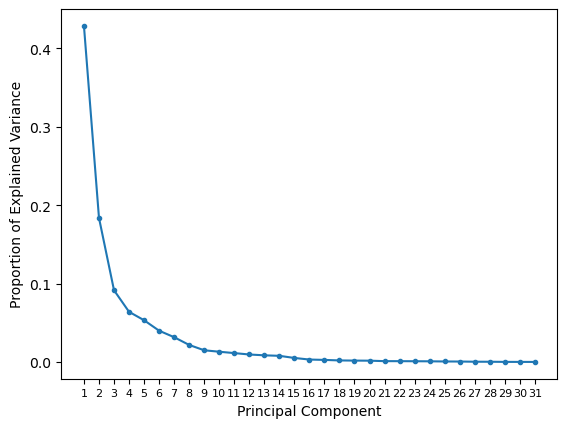

In [24]:
plt.plot(range(1,32),pca.explained_variance_ratio_[:scaled_df.shape[1]], marker = '.')
plt.xticks(ticks= range(1,32), fontsize= 8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

Choosing the Number of Components to Return

Choosing more principal components will always increase the cumulative amount of variance explained by the components. (The more principal components, the more information we are retaining).

Increasing Components Increases the Cumulative Variance Explained

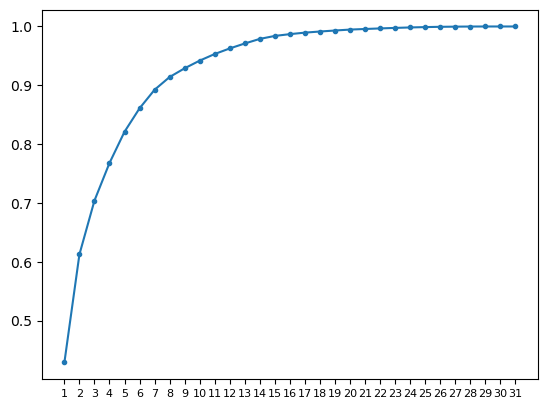

In [21]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 32), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,32), fontsize=8);

Visualize Scree Plot
We can visualize the individual contribution of each principal component using a Scree plot:

Text(0, 0.5, 'Proportion of Explained Variance')

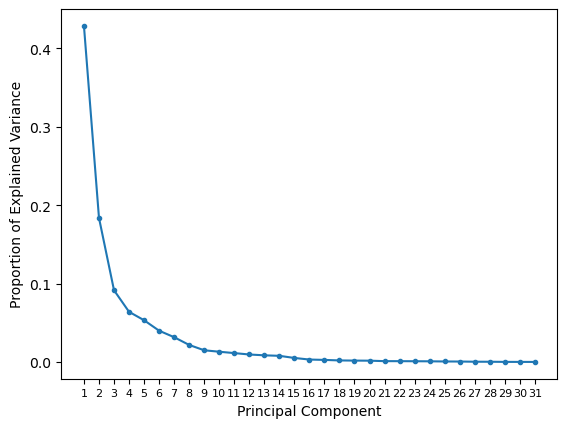

In [22]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 32), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 32), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

Elbow Method
Based on the graph above, how many principal components should we keep? The "elbow" or inflection point on the graph above can be seen around 7 principal components. This is where we don't get much benefit from further increasing the number of components, so it represents a good balance.

The code below shows how to specify the number of components to return when you instantiate PCA:

In [13]:
# PCA with 7 components
pca7 = PCA(n_components=7)

Specifying the Explained Variance
Rather than specifying the number of components to return, an alternate method is to specify the minimum proportion of explained variance you are willing to accept. PCA will automatically reduce the number of components just enough to meet your specification.

To specify the proportion of variance, give the n_components argument a float between 0 and 1, and it will return the number of components required to explain the given variance.

The code below is an example of how to ensure that enough components are returned to explain 85% of the variance:

In [15]:
# PCA with 85% explained variance
pca85 = PCA(n_components=.85)

Train split

In [16]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

Create a PCA Pipeline with Standard Scaler

In [18]:
# Create a transformer pipeline
from sklearn.pipeline import make_pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

Put the PCA Pipeline in Another Pipeline with a Logistic Regression

In [19]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

Evaluate Model

In [20]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.9835680751173709
Testing accuracy: 0.972027972027972
